In [ ]:
from google.colab import files
uploaded = files.upload()


Saving AirQualityUCI.xlsx to AirQualityUCI (2).xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file (use the exact uploaded filename)
df = pd.read_excel('AirQualityUCI.xlsx', sheet_name='AirQualityUCI')

# Convert 'Date' and 'Time' to datetime
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')
df.dropna(subset=['Datetime'], inplace=True)
df.set_index('Datetime', inplace=True)

# Replace -200 with np.nan in numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].replace(-200, np.nan)

# Drop rows with less than 80% valid data
df.dropna(thresh=int(len(df.columns) * 0.8), inplace=True)


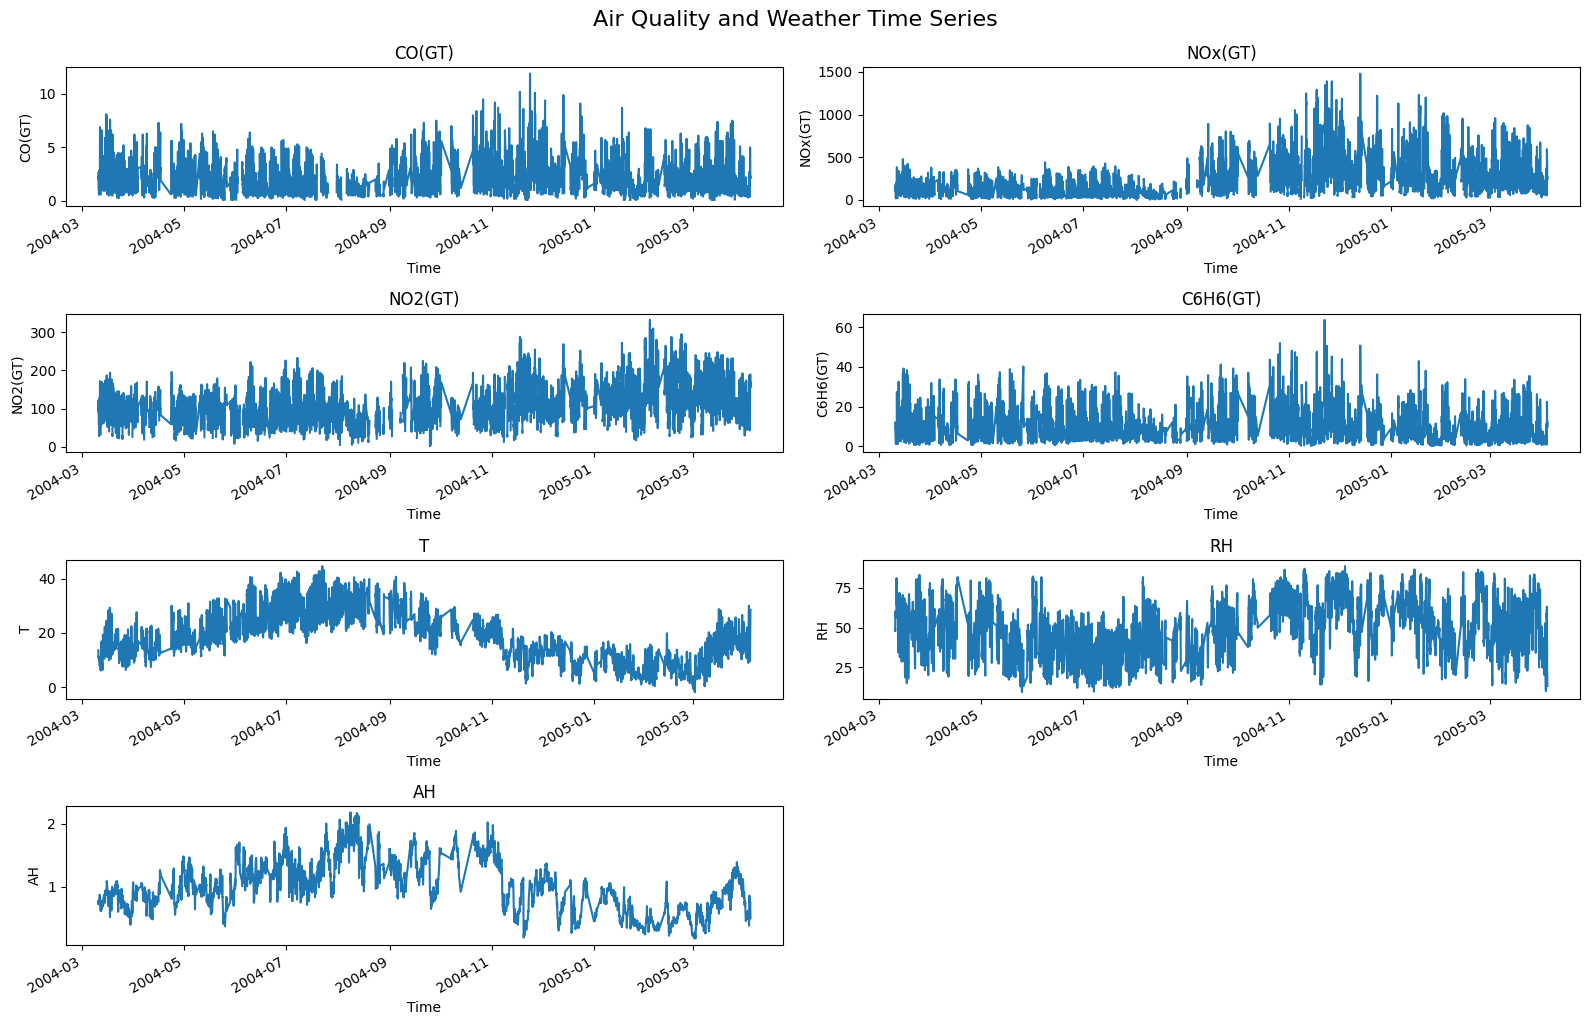

In [ ]:
# Columns to plot
plot_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

plt.figure(figsize=(16, 10))
for i, col in enumerate(plot_cols, 1):
    plt.subplot(4, 2, i)
    df[col].astype(float).plot()
    plt.title(col)
    plt.xlabel('Time')
    plt.ylabel(col)

plt.tight_layout()
plt.suptitle('Air Quality and Weather Time Series', fontsize=16, y=1.02)
plt.show()


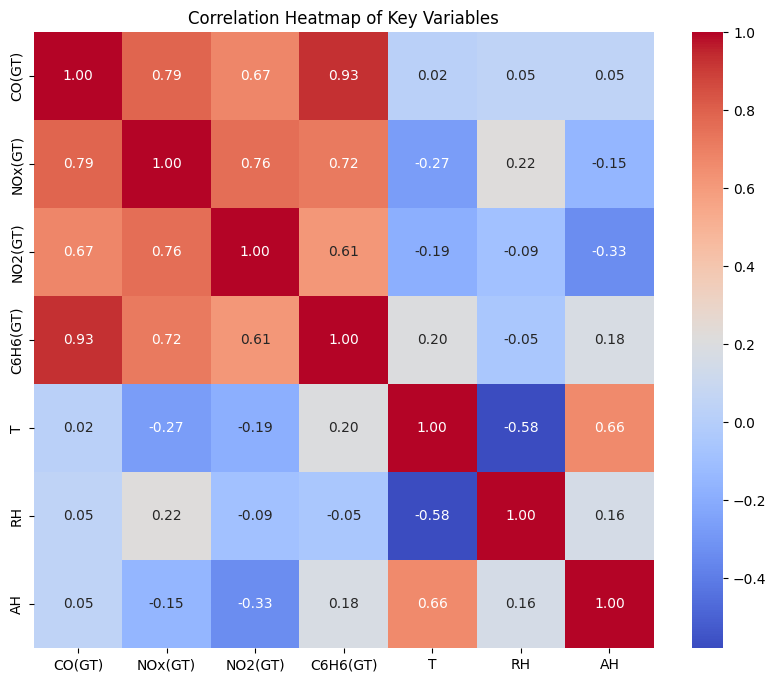

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[plot_cols].astype(float).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Variables')
plt.show()
